# Deep Learning with PyTorch: Zero-To-GANs
This Notebook contains codes and exercises of the course provided by `Jovian.ai`

## Importing necessary libraries

In [1]:
# importing necessary libraries
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
import os
import tarfile
from torchvision.datasets.utils import download_url
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Lesson 1: `PyTorch Basics and Gradient Descent`

**Topics covered in this lesson:** <br/>
### 1.1 PyTorch basics: Tensors, Gradients, and Autograd
### 1.2 Linear Regression & Gradient Descent from scratch
### 1.3 Using PyTorch Modules: nn.Linear & nn.functional

We begin by importing PyTorch

In [2]:
# Uncomment the command below if PyTorch is not installed
# !conda install pytorch cpuonly -c pytorch -y

In [3]:
import torch

In [4]:
torch.__version__

'1.13.1+cu117'

### 1.1 PyTorch basics: `Tensors, Gradients, and Autograd`

#### 1.1(a) Tensors

At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix or any n-dimensional array. Let's create a tensor with a single number:

In [5]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

`4.` is a shorthand for `4.0`. It is used to indicate to Python (and PyTorch) that you want to create a floating point number. We can verify this by checking the `dtype` attribute of our tensor:

In [6]:
t1.dtype

torch.float32

Let's try creating slightly more complex tensors:

In [7]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [8]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [9]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

Tensors can have any number of dimensions, and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of a tensor.

In [10]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [11]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [12]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [13]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

#### 1.1(b) Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look an example:

In [14]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

We've created 3 tensors `x`, `w` and `b`, all numbers. `w` and `b` have an additional parameter `requires_grad` set to `True`. We'll see what it does in just a moment. 

Let's create a new tensor `y` by combining these tensors:

In [15]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

As expected, `y` is a tensor with the value `3 * 4 + 5 = 17`. What makes PyTorch special is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. To compute the derivatives, we can call the `.backward` method on our result `y`.

In [16]:
# Compute derivatives
y.backward()

The derivates of `y` w.r.t the input tensors are stored in the `.grad` property of the respective tensors.

In [17]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, `dy/dw` has the same value as `x` i.e. `3`, and `dy/db` has the value `1`. Note that `x.grad` is `None`, because `x` doesn't have `requires_grad` set to `True`. 

The "grad" in `w.grad` stands for gradient, which is another term for derivative, used mainly when dealing with matrices. 

#### 1.1(c) Torch Functions
Apart from arithmetic operations, the `torch` module also contains many functions for creating and manipulating tensors.
Let's look at some examples

In [18]:
# Creates a Tensor with a fixed value for every element
t6 = torch.full((3,2),42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [19]:
# Concatenates two Tensors with compatible shapes
t7 = torch.cat((t3,t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [20]:
# Computes the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [21]:
t8.shape

torch.Size([6, 2])

In [22]:
# Changes the shape of a Tensor
t9 = t8.reshape(3,2,2)
t9 

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

To learn more about Tensor operations, as there about `1000+` tensor operations, visit the documentation page here:
https://pytorch.org/docs/stable/torch.html

#### 1.1(d) Interoperability with Numpy

[Numpy](http://www.numpy.org/) is a popular open source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays, and has a large ecosystem of supporting libraries:

* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing
* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis

Instead of reinventing the wheel, PyTorch interoperates really well with Numpy to leverage its existing ecosystem of tools and libraries.

In [23]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.

In [24]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [25]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

So, x and y both are float64 but x is a `normal float64` integer whereas y is a `torch.float64`

We can also convert a PyTorch Tensor to a NumPy array, using the `.numpy` method of Tensor

In [26]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability b/w PyTorch and NumPy is essential because most datasets we'll work on, will likely be read and preprocessed as NumPy arrays.
There are 2 main reasons as to why we need a library like PyTorch:
1. `Autograd:` the ability to automatically compute gradients(derivatives) for tensor operations is essential for training Deep Learning models.
2. `GPU Support:` while working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a GPU.

### 1.2 `Linear Regression & Gradient Descent`

#### 1.2(a) Introduction to Linear Regression

In this tutorial, we'll discuss one of the foundational algorithms in machine learning: *Linear regression*. We'll create a model that predicts crop yields for apples and oranges (*target variables*) by looking at the average temperature, rainfall, and humidity (*input variables or features*) in a region. Here's the training data:

![linear-regression-training-data](https://i.imgur.com/6Ujttb4.png)

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

![linear-regression-graph](https://i.imgur.com/4DJ9f8X.png)


The *learning* part of linear regression is to figure out a set of weights `w11, w12,... w23, b1 & b2` using the training data, to make accurate predictions for new data. The _learned_ weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region. 

We'll _train_ our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called *gradient descent*. Let's begin by importing Numpy and PyTorch.

#### 1.2(b) Training data

We can represent the training data using two matrices: `inputs` and `targets`, each with one row per observation, and one column per variable.

In [27]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [28]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

We've separated the input and target variables because we'll operate on them separately. Also, we've created numpy arrays, because this is typically how you would work with training data: read some CSV files as numpy arrays, do some processing, and then convert them to PyTorch tensors.

Let's convert the arrays to PyTorch tensors.

In [29]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


#### 1.2(c) Linear regression model from scratch

The weights and biases (`w11, w12,... w23, b1 & b2`) can also be represented as matrices, initialized as random values. The first row of `w` and the first element of `b` are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [30]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.6812, -0.4731, -1.1408],
        [ 0.0442, -0.1968, -0.9182]], requires_grad=True)
tensor([-1.1844, -0.0767], requires_grad=True)


`torch.randn` creates a tensor with the given shape, with elements picked randomly from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean 0 and standard deviation 1.

Our *model* is simply a function that performs a matrix multiplication of the `inputs` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

![matrix-mult](https://i.imgur.com/WGXLFvA.png)

We can define the model as follows:

In [31]:
def model(x):
    return x @ w.t() + b

***`Note:`*** `@` represents matrix multiplication in PyTorch, and the `.t` method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [32]:
inputs @ w.t() + b

tensor([[-131.6677,  -49.5119],
        [-177.8219,  -72.1296],
        [-190.0167,  -75.8484],
        [-133.2236,  -37.9973],
        [-173.4645,  -80.1863]], grad_fn=<AddBackward0>)

That is all it is, that is how our machine learning model works<br/>

`Ml Model -> takes the input -> performs matrix multiplication -> addes some bias -> churns out an output`

So this is how our Model makes Predictions

In [33]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-131.6677,  -49.5119],
        [-177.8219,  -72.1296],
        [-190.0167,  -75.8484],
        [-133.2236,  -37.9973],
        [-173.4645,  -80.1863]], grad_fn=<AddBackward0>)


Let's compare the predictions of our model with the actual targets.

In [34]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


You can see a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to *just work*.

#### 1.2(d) Loss function

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

* Calculate the difference between the two matrices (`preds` and `targets`).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the **mean squared error** (MSE).

In [35]:
# diff here is a difference matrix we store it in a variable or directly methods of tensor as follows
# diff = preds - targets
mean_square_error = torch.sum((preds - targets) * (preds - targets)) / (preds - targets).numel()
mean_square_error

tensor(43140.0664, grad_fn=<DivBackward0>)

`torch.sum` returns the sum of all the elements in a tensor. The `.numel` method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.

In [36]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [37]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(43140.0664, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: ***On average, each element in the prediction differs from the actual target by the square root of the loss***. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the *`loss`* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

#### 1.2(e) Compute gradients

With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have `requires_grad` set to `True`. We'll see how this is useful in just a moment.

In [38]:
# Compute gradients
loss.backward()

The gradients are stored in the `.grad` property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

In [39]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.6812, -0.4731, -1.1408],
        [ 0.0442, -0.1968, -0.9182]], requires_grad=True)
tensor([[-19809.1699, -21994.7031, -13530.6143],
        [-12808.5098, -14715.0322,  -9010.0918]])


#### 1.2(f) Adjust weights and biases to reduce the loss

The loss is a [quadratic function](https://en.wikipedia.org/wiki/Quadratic_function) of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's [slope](https://en.wikipedia.org/wiki/Slope) w.r.t. the weights and biases.

If a gradient element is **positive**:

* **increasing** the weight element's value slightly will **increase** the loss
* **decreasing** the weight element's value slightly will **decrease** the loss

![postive-gradient](https://i.imgur.com/WLzJ4xP.png)

If a gradient element is **negative**:

* **increasing** the weight element's value slightly will **decrease** the loss
* **decreasing** the weight element's value slightly will **increase** the loss

![negative=gradient](https://i.imgur.com/dvG2fxU.png)

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of _the gradient descent_ optimization algorithm that we'll use to improve our model (by _descending_ along the _gradient_).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [40]:
w
w.grad

tensor([[-19809.1699, -21994.7031, -13530.6143],
        [-12808.5098, -14715.0322,  -9010.0918]])

So as we can see, the grads or the derivatives of `w`. <br/>
If the derivatives are `negative` then that means the `rate of change is decreasing`, vice versa.<br/>
If the derivatives are `negative` we need to slightly `increase the weights`, and if it is `positive` we need to slightly `decrease the weights`.

In [41]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [42]:
w,b

(tensor([[-0.4831, -0.2532, -1.0055],
         [ 0.1723, -0.0496, -0.8281]], requires_grad=True),
 tensor([-1.1821, -0.0751], requires_grad=True))

We multiply the gradients with a very small number (`10^-5` in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the *learning rate* of the algorithm. 

We use `torch.no_grad` to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [43]:
# Let's verify that the loss is actually lower
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(29290.5508, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the `.zero_()` method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke `.backward` on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [44]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


***`Gradient Descent:`*** In essense it is just taking some random weights and using the gradients to identify how to adjust them slightly, to reduce the loss.

#### 1.2(g) Train the model using gradient descent

As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can _train_ the model using the following steps:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero

Let's implement the above step by step.

In [45]:
# Step 1: Generate Predictions
preds = model(inputs)
print(preds)

tensor([[ -96.6500,  -26.4268],
        [-131.7783,  -41.7566],
        [-135.4597,  -39.7595],
        [ -98.5518,  -15.2698],
        [-129.2075,  -50.9134]], grad_fn=<AddBackward0>)


In [46]:
# Step 2: Calculate the loss
loss = mse(preds,targets)
print(loss)

tensor(29290.5508, grad_fn=<DivBackward0>)


In [47]:
# Step 3: Compute Gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-16192.5752, -18105.0566, -11131.0732],
        [-10423.1250, -12146.4463,  -7426.1484]])
tensor([-194.5295, -126.8252])


In [48]:
# Step 4: Adjust weights and reset the gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()    

In [49]:
# Print the new weights and biases
print(w)
print(b)

tensor([[-0.3212, -0.0721, -0.8942],
        [ 0.2766,  0.0719, -0.7538]], requires_grad=True)
tensor([-1.1801, -0.0738], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [50]:
# Step 5: with new weights and biases calculate the loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(19955.3164, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.

#### 1.2(h) Train for multiple epochs

To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an _epoch_. Let's train the model for 100 epochs.

In [51]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [52]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(272.4356, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [53]:
# Predictions
preds

tensor([[ 61.0443,  75.6411],
        [ 77.8158,  95.4479],
        [122.4399, 136.2632],
        [ 44.0617,  67.1850],
        [ 80.6396,  92.4331]], grad_fn=<AddBackward0>)

In [54]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs. 

### 1.3 Using PyTorch modules: `nn.Linear & nn.functional`

#### 1.3(a) Linear regression using PyTorch built-ins

We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

Let's begin by importing the `torch.nn` package from PyTorch, which contains utility classes for building neural networks.

In [55]:
import torch.nn as nn

As before, we represent the inputs and targets and matrices.

In [56]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [57]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

We are using 15 training examples to illustrate how to work with large datasets in small batches. 

#### 1.3(b) Dataset and DataLoader

We'll create a `TensorDataset`, which allows access to rows from `inputs` and `targets` as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.

In [58]:
from torch.utils.data import TensorDataset

In [59]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

The `TensorDataset` allows us to access a small section of the training data using the array indexing notation (`[0:3]` in the above code). It returns a tuple with two elements. The first element contains the input variables for the selected rows, and the second contains the targets.

We'll also create a `DataLoader`, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [60]:
from torch.utils.data import DataLoader

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

We can use the data loader in a `for` loop. Let's look at an example.

In [61]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[101.,  44.,  37.],
        [ 92.,  87.,  64.],
        [103.,  43.,  36.],
        [ 88., 134.,  59.],
        [ 91.,  88.,  64.]])
tensor([[ 21.,  38.],
        [ 82., 100.],
        [ 20.,  38.],
        [118., 132.],
        [ 81., 101.]])


In each iteration, the data loader returns one batch of data with the given batch size. If `shuffle` is set to `True`, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

#### 1.3(c) nn.Linear

Instead of initializing the weights & biases manually, we can define the model using the `nn.Linear` class from PyTorch, which does it automatically.

In [62]:
# Define the Model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0633,  0.1979,  0.1530],
        [-0.2294, -0.0883,  0.0124]], requires_grad=True)
Parameter containing:
tensor([-0.5747,  0.4443], requires_grad=True)


***`nn.Linear(3,2):`*** is the way we specify the number of inputs and the number of outputs that we going to get out of it. <br/>
* So we have 3 Inputs - Temperature, Rainfall, and Humidity.<br/>
* And 2 Outputs - Yield of Apples and Yield of Oranges.

***`nn.Linear:`*** Is the linear layer of a neural network, which is a weights and bias matrix bundled into this object which can also be used as a function.

PyTorch also have a helpful `.parameters` method, which returns a list containing all the weights and bias matrices present in the model.<br/>
For our Linear Regression model, we have one weight matrix and one bias matrix.

**Note:** this is going to be very helpful when we will be dealing with the `Layered ML Models` - a model with multiple different models layered into it.

In [63]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0633,  0.1979,  0.1530],
         [-0.2294, -0.0883,  0.0124]], requires_grad=True),
 Parameter containing:
 tensor([-0.5747,  0.4443], requires_grad=True)]

We can use the model to generate the predictions in the same way as before.

In [64]:
# Generate Predictions
preds = model(inputs)
preds

tensor([[ 14.6409, -21.6887],
        [ 20.8700, -27.4129],
        [ 29.3096, -30.6313],
        [  7.1357, -26.2978],
        [ 24.7650, -22.9971],
        [ 14.3796, -21.8298],
        [ 20.8251, -27.3122],
        [ 29.3993, -30.8483],
        [  7.3970, -26.1566],
        [ 24.9814, -22.7553],
        [ 14.5959, -21.5880],
        [ 20.6088, -27.5540],
        [ 29.3545, -30.7320],
        [  6.9194, -26.5396],
        [ 25.0263, -22.8560]], grad_fn=<AddmmBackward0>)

#### 1.3(d) *nn.functional* - Loss Function

Instead of defining a loss function manually, we can use the built-in loss function `mse_loss`.

In [65]:
# Import nn.functional
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

# Let's compute the loss for the current predictions of our model.
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9542.5879, grad_fn=<MseLossBackward0>)


The `nn.functional` package contains many useful loss functions and several other utilities. 

#### 1.3(e) Optimizer

Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer `optim.SGD`. SGD is short for "stochastic gradient descent". The term _stochastic_ indicates that samples are selected in random batches instead of as a single group.

In [66]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Note that `model.parameters()` is passed as an argument to `optim.SGD` so that the optimizer knows which matrices should be modified during the update step. Also, we can specify a learning rate that controls the amount by which the parameters are modified.

#### 1.3(f) Train the model

We are now ready to train the model. We'll follow the same process to implement gradient descent:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero

The only change is that we'll work batches of data instead of processing the entire training data in every iteration. Let's define a utility function `fit` that trains the model for a given number of epochs.

In [67]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Some things to note above:

* We use the data loader defined earlier to get batches of data for every iteration.

* Instead of updating parameters (weights and biases) manually, we use `opt.step` to perform the update and `opt.zero_grad` to reset the gradients to zero.

* We've also added a log statement that prints the loss from the last batch of data for every 10th epoch to track training progress. `loss.item` returns the actual value stored in the loss tensor.

Let's train the model for 100 epochs.

In [68]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 321.3706
Epoch [20/100], Loss: 108.4868
Epoch [30/100], Loss: 87.3965
Epoch [40/100], Loss: 60.5507
Epoch [50/100], Loss: 57.3339
Epoch [60/100], Loss: 32.5827
Epoch [70/100], Loss: 25.0149
Epoch [80/100], Loss: 33.5957
Epoch [90/100], Loss: 12.0931
Epoch [100/100], Loss: 15.6693


Let's generate predictions using our model and verify that they're close to our targets.

In [69]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.7945,  71.4984],
        [ 80.9269,  98.5960],
        [118.9728, 135.2843],
        [ 26.4106,  43.5840],
        [ 96.5876, 111.8194],
        [ 56.6601,  70.5022],
        [ 80.5303,  98.2904],
        [119.1711, 135.6974],
        [ 27.5450,  44.5803],
        [ 97.3255, 112.5100],
        [ 57.3979,  71.1927],
        [ 79.7925,  97.5998],
        [119.3694, 135.5900],
        [ 25.6727,  42.8935],
        [ 97.7220, 112.8156]], grad_fn=<AddmmBackward0>)

In [70]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have a trained a reasonably good model to predict crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region. We can use it to make predictions of crop yields for new regions by passing a batch containing a single row of input.

In [71]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.2643, 68.3428]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.

### *`Machine Learning vs. Classical Programming`*

The approach we've taken in this tutorial is very different from programming as you might know it. Usually, we write programs that take some inputs, perform some operations, and return a result. 

However, in this notebook, we've defined a "model" that assumes a specific relationship between the inputs and the outputs, expressed using some unknown parameters (weights & biases). We then show the model some know inputs and outputs and _train_ the model to come up with good values for the unknown parameters. Once trained, the model can be used to compute the outputs for new inputs.

This paradigm of programming is known as _machine learning_, where we use data to figure out the relationship between inputs and outputs. _Deep learning_ is a branch of machine learning that uses matrix operations, non-linear activation functions and gradient descent to build and train models. Andrej Karpathy, the director of AI at Tesla Motors, has written a great blog post on this topics, titled [Software 2.0](https://medium.com/@karpathy/software-2-0-a64152b37c35).

This picture from book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet captures the difference between classical programming and machine learning:

![](https://i.imgur.com/oJEQe7k.png)

Keep this picture in mind as you work through the next few tutorials. 


### *`Exercises and Further Reading`*

We've covered the following topics in this tutorial:

- Introduction to linear regression and gradient descent
- Implementing a linear regression model using PyTorch tensors
- Training a linear regression model using the gradient descent algorithm
- Implementing gradient descent and linear regression using PyTorch built-in


Here are some resources for learning more about linear regression and gradient descent:

* An visual & animated explanation of gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w

* For a more detailed explanation of derivates and gradient descent, see [these notes from a Udacity course](https://storage.googleapis.com/supplemental_media/udacityu/315142919/Gradient%20Descent.pdf). 

* For an animated visualization of how linear regression works, [see this post](https://hackernoon.com/visualizing-linear-regression-with-pytorch-9261f49edb09).

* For a more mathematical treatment of matrix calculus, linear regression and gradient descent, you should check out [Andrew Ng's excellent course notes](https://github.com/Cleo-Stanford-CS/CS229_Notes/blob/master/lectures/cs229-notes1.pdf) from CS229 at Stanford University.

* To practice and test your skills, you can participate in the [Boston Housing Price Prediction](https://www.kaggle.com/c/boston-housing) competition on Kaggle, a website that hosts data science competitions.

With this, we complete our discussion of linear regression in PyTorch, and we’re ready to move on to the next topic: [Working with Images & Logistic Regression](https://jovian.ai/aakashns/03-logistic-regression).

### *`Questions for Review`*

1. What is a linear regression model? Give an example of a problem formulated as a linear regression model.
2. What are input and target variables in a dataset? Give an example.
3. What are weights and biases in a linear regression model?
4. How do you represent tabular data using PyTorch tensors?
5. Why do we create separate matrices for inputs and targets while training a linear regression model?
6. How do you determine the shape of the weights matrix & bias vector given some training data?
7. How do you create randomly initialized weights & biases with a given shape?
8. How is a linear regression model implemented using matrix operations? Explain with an example.
9. How do you generate predictions using a linear regression model?
10. Why are the predictions of a randomly initialized model different from the actual targets?
11. What is a loss function? What does the term “loss” signify?
12. What is mean squared error?
13. Write a function to calculate mean squared using model predictions and actual targets.
14. What happens when you invoke the `.backward` function on the result of the mean squared error loss function?
15. Why is the derivative of the loss w.r.t. the weights matrix itself a matrix? What do its elements represent?
16. How is the derivate of the loss w.r.t. a weight element useful for reducing the loss? Explain with an example.
17. Suppose the derivative  of the loss w.r.t. a weight element is positive. Should you increase or decrease the element’s value slightly to get a lower loss?
18. Suppose the derivative  of the loss w.r.t. a weight element is negative. Should you increase or decrease the element’s value slightly to get a lower loss?
19. How do you update the weights and biases of a model using their respective gradients to reduce the loss slightly?
20. What is the gradient descent optimization algorithm? Why is it called “gradient descent”?
21. Why do you subtract a “small quantity” proportional to the gradient from the weights & biases, not the actual gradient itself?
22. What is learning rate? Why is it important?
23. What is `torch.no_grad`?
24. Why do you reset gradients to zero after updating weights and biases?
25. What are the steps involved in training a linear regression model using gradient descent?
26. What is an epoch?
27. What is the benefit of training a model for multiple epochs?
28. How do you make predictions using a trained model?
29. What should you do if your model’s loss doesn’t decrease while training? Hint: learning rate.
30. What is `torch.nn`?
31. What is the purpose of the `TensorDataset` class in PyTorch? Give an example.
32. What is a data loader in PyTorch? Give an example.
33. How do you use a data loader to retrieve batches of data?
34. What are the benefits of shuffling the training data before creating batches?
35. What is the benefit of training in small batches instead of training with the entire dataset?
36. What is the purpose of the `nn.Linear` class in PyTorch? Give an example.
37. How do you see the weights and biases of a `nn.Linear` model?
38. What is the purpose of the `torch.nn.functional` module?
39. How do you compute mean squared error loss using a PyTorch built-in function?
40. What is an optimizer in PyTorch?
41. What is `torch.optim.SGD`? What does SGD stand for?
42. What are the inputs to a PyTorch optimizer? 
43. Give an example of creating an optimizer for training a linear regression model.
44. Write a function to train a `nn.Linear` model in batches using gradient descent.
45. How do you use a linear regression model to make predictions on previously unseen data?

### *`Feed Forward Neural Network`*
We are trying to convert our previously built Model and turn it into a Deep Learning Model or a Feed Forward Neural Network.<br/>
We are going to use `nn.Sequential` to create a layered model.

### *`Linear Regression`*

#### Linear Regression Data

<img src="https://i.imgur.com/mtkR2lB.png" width="540" >

#### Linear Regression Visualization

<img src="https://i.imgur.com/mtkR2lB.png" width="480">


#### Linear Regression model

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

### *`Feedfoward Neural Network`*

![ffnn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/400px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Conceptually, you think of feedforward neural networks as two or more linear regression models stacked on top of one another with a non-linear activation function applied between them.

<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" width="640">

To use a feedforward neural network instead of linear regression, we can extend the `nn.Module` class from PyTorch.

In [72]:
# Creating our Second Model for FFNN
model2 = nn.Sequential(
    # The below layer is called a Hidden Layer
    nn.Linear(3,3),
    
    # The below layer is called an Activation Function or Non-Linearity
    nn.Sigmoid(),

    # The below layer is called Output Layer
    nn.Linear(3,2)
)

In [73]:
opt = torch.optim.SGD(model2.parameters(),lr=1e-3)

In [74]:
fit(100, model2, F.mse_loss, opt, train_dl)

Epoch [10/100], Loss: 4722.2173
Epoch [20/100], Loss: 3936.6587
Epoch [30/100], Loss: 6483.4180
Epoch [40/100], Loss: 3913.8171
Epoch [50/100], Loss: 5295.5396
Epoch [60/100], Loss: 5001.5205
Epoch [70/100], Loss: 2850.6399
Epoch [80/100], Loss: 2080.6770
Epoch [90/100], Loss: 1645.2260
Epoch [100/100], Loss: 1106.1538


**What we are actually doing in this:**
1. We are taking the intermediate outputs `nn.Linear(3,3)`
2. Applying the Non-Linearity `nn.Sigmoid()`
3. Then we multiply it with another weight matrix and add the biases `nn.Linear(3,2)` and give the outputs.

Now what has changed here is instead of having a Linear relationship between the inputs and outputs, we have now assumed that there is some<br/>
amount of non-linearity in the relationship.<br/>

So we have made the model more powerful. Now our model has more parameters and our model has these ways of learning non-linear relationships.<br/>

So now our model can capture not just linear relationship, but also slightly non-linear relationships.<br/>

And as relationships get more and more non-linear and more and more complex we may need more layers in the model and we may need bigger layers as well. So instead of getting 3 intermediate outputs, we may need to get a 100 intermediate outputs, and so on.<br/>

But the way we train it is the exact same way, which is `Gradient Descent`. And that is really what is the essence of Deep Learning, on how to train models.

## Lesson 2: `Working with Images and Logistic Regression`

**Topics covered in this lesson:** <br/>
### 2.1 Training-Validation Split on the MNIST Dataset
### 2.2 Logistic Regression, Softmax & Cross-Entropy
### 2.3 Model Training, Evaluation & Sample Predictions

### 2.1 `Training-Validation Split on the MNIST Dataset`

#### 2.1(a) Setting up the Datasets: Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

We begin by installing and importing `torch` and `torchvision`. `torchvision` contains some utilities for working with image data. It also provides helper classes to download and import popular datasets like MNIST automatically

In [75]:
# Imports
import torchvision
from torchvision.datasets import MNIST

In [76]:
torchvision.__version__

'0.14.1+cu117'

In [77]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded. Let's check the size of the dataset.

In [78]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [79]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset.

In [80]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/), the de-facto plotting and graphing library for data science in Python.

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib inline` indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.

Label: 5


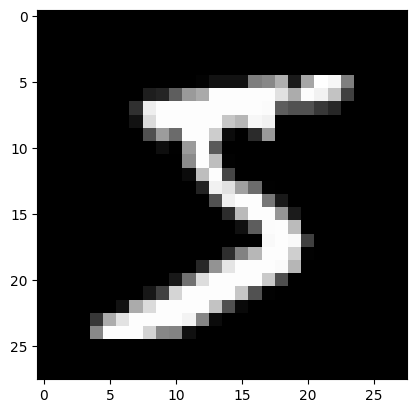

In [82]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


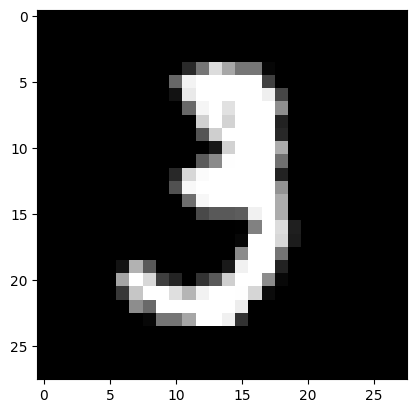

In [83]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [84]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [85]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB). 

Let's look at some sample values inside the tensor.

In [86]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`.

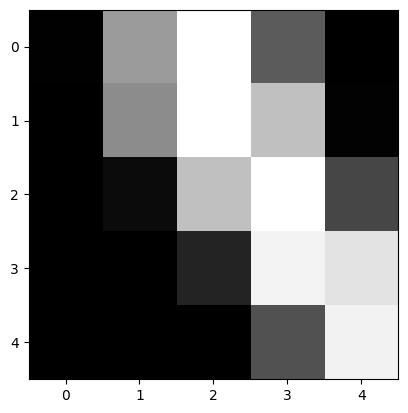

In [87]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the 28x28 matrix to `plt.imshow`, without a channel dimension. We also pass a color map (`cmap=gray`) to indicate that we want to see a grayscale image.

#### 2.1(b) Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [88]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

It's essential to choose a random sample for creating a validation set. Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

We can now create data loaders to help us load the data in batches. We'll use a batch size of 128.

In [89]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images. 

### 2.2 `Logistic Regression, Softmax & Cross-Entropy`

#### 2.2(a) Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [90]:
# Because we have already imported this
#import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model in terms of the number of parameters. Let's take a look at the weights and biases.

In [91]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0231,  0.0302, -0.0150,  ...,  0.0304, -0.0326, -0.0180],
        [ 0.0175,  0.0044, -0.0231,  ..., -0.0067, -0.0042,  0.0134],
        [ 0.0350,  0.0290, -0.0092,  ...,  0.0025,  0.0261, -0.0232],
        ...,
        [-0.0328, -0.0084,  0.0230,  ...,  0.0333, -0.0318,  0.0348],
        [-0.0044,  0.0045, -0.0051,  ...,  0.0068,  0.0312,  0.0084],
        [ 0.0004,  0.0185,  0.0297,  ..., -0.0100,  0.0225, -0.0112]],
       requires_grad=True)

In [92]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0029, -0.0193,  0.0019, -0.0107, -0.0123, -0.0021,  0.0097,  0.0268,
         0.0239, -0.0267], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset and pass them into our model.

In [93]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 1, 7, 1, 2, 6, 2, 8, 2, 9, 3, 1, 5, 3, 2, 3, 9, 5, 4, 7, 1, 2, 0, 3,
        2, 4, 0, 1, 0, 8, 1, 1, 3, 7, 4, 4, 0, 8, 3, 6, 5, 1, 8, 8, 3, 8, 4, 5,
        9, 1, 4, 9, 8, 7, 9, 9, 5, 0, 8, 6, 0, 0, 7, 8, 4, 6, 6, 2, 3, 6, 9, 4,
        3, 7, 2, 6, 8, 4, 1, 5, 4, 5, 2, 3, 0, 2, 4, 4, 0, 6, 0, 5, 8, 5, 0, 6,
        5, 6, 5, 6, 1, 2, 0, 8, 4, 7, 3, 7, 8, 8, 4, 5, 7, 5, 9, 1, 0, 2, 8, 1,
        4, 2, 1, 0, 9, 7, 8, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [94]:
images.shape

torch.Size([128, 1, 28, 28])

In [95]:
images.reshape(128, 784).shape

torch.Size([128, 784])

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch. 

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python.

In [96]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

In [97]:
# Here's how we create or _instantiate_ an object of the class `Person`.

bob = Person("Bob", 32)

The object `bob` is an instance of the class `Person`. 

We can access the object's properties (also called attributes) or invoke its methods using the `.` notation.

In [98]:
bob.name, bob.age

('Bob', 32)

In [99]:
bob.say_hello()

Hello my name is Bob!


You can learn more about Python classes here: https://www.w3schools.com/python/python_classes.asp .

Classes can also build upon or _extend_ the functionality of existing classes. Let's extend the `nn.Module` class from PyTorch to define a custom model.

In [100]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [101]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [102]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0098,  0.0200, -0.0179,  ...,  0.0184, -0.0191, -0.0010],
         [-0.0056,  0.0028, -0.0213,  ..., -0.0231, -0.0334,  0.0273],
         [ 0.0316,  0.0090, -0.0230,  ...,  0.0020,  0.0306,  0.0095],
         ...,
         [ 0.0047, -0.0147, -0.0078,  ...,  0.0341,  0.0176, -0.0230],
         [-0.0338,  0.0355, -0.0115,  ...,  0.0256, -0.0342, -0.0078],
         [ 0.0254, -0.0235,  0.0293,  ...,  0.0343,  0.0023,  0.0210]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0121,  0.0070,  0.0253, -0.0043,  0.0273,  0.0083,  0.0279,  0.0129,
         -0.0220, -0.0253], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [103]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-6.2685e-02,  2.8890e-01,  2.4708e-02, -1.0040e-01,  8.4586e-02,
         -7.4212e-02, -1.4698e-01,  2.1010e-01, -3.2523e-04, -6.5386e-02],
        [-1.3011e-01,  1.3378e-01, -9.5654e-02, -2.3102e-01, -6.7971e-02,
         -1.6051e-01, -2.0976e-02,  8.8096e-02,  3.5274e-01, -2.0487e-02]])


#### 2.2(b) Softmax Function

For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [104]:
# We have already imported this
# import torch.nn.functional as F

In [105]:
outputs[:2]

tensor([[-6.2685e-02,  2.8890e-01,  2.4708e-02, -1.0040e-01,  8.4586e-02,
         -7.4212e-02, -1.4698e-01,  2.1010e-01, -3.2523e-04, -6.5386e-02],
        [-1.3011e-01,  1.3378e-01, -9.5654e-02, -2.3102e-01, -6.7971e-02,
         -1.6051e-01, -2.0976e-02,  8.8096e-02,  3.5274e-01, -2.0487e-02]],
       grad_fn=<SliceBackward0>)

In [106]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0916, 0.1302, 0.1000, 0.0882, 0.1061, 0.0905, 0.0842, 0.1203, 0.0975,
         0.0914],
        [0.0879, 0.1145, 0.0910, 0.0795, 0.0936, 0.0853, 0.0981, 0.1094, 0.1425,
         0.0981]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [107]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 8, 7, 8, 8, 8, 8, 5, 4, 2, 8, 8, 8, 7, 8, 8, 7, 6, 8, 2, 0, 8, 1, 8,
        7, 8, 8, 1, 2, 2, 5, 7, 7, 7, 8, 8, 8, 0, 4, 7, 8, 8, 8, 8, 8, 8, 8, 1,
        8, 8, 8, 8, 7, 1, 6, 8, 8, 8, 8, 1, 7, 1, 8, 8, 8, 4, 4, 7, 3, 8, 5, 8,
        8, 8, 3, 2, 8, 8, 8, 8, 4, 8, 8, 8, 8, 7, 8, 1, 7, 8, 1, 4, 8, 1, 8, 8,
        7, 1, 8, 8, 7, 8, 7, 6, 7, 1, 6, 8, 6, 0, 2, 4, 6, 8, 5, 7, 2, 8, 7, 6,
        2, 8, 6, 8, 8, 6, 8, 8])
tensor([0.1302, 0.1425, 0.1175, 0.1304, 0.1317, 0.1520, 0.1145, 0.1219, 0.1190,
        0.1333, 0.1305, 0.1227, 0.1347, 0.1408, 0.1200, 0.1173, 0.1214, 0.1251,
        0.1231, 0.1298, 0.1269, 0.1281, 0.1231, 0.1325, 0.1213, 0.1248, 0.1475,
        0.1463, 0.1290, 0.1366, 0.1309, 0.1320, 0.1306, 0.1295, 0.1253, 0.1213,
        0.1366, 0.1251, 0.1282, 0.1253, 0.1516, 0.1241, 0.1171, 0.1461, 0.1302,
        0.1314, 0.1284, 0.1171, 0.1232, 0.1432, 0.1171, 0.1297, 0.1247, 0.1241,
        0.1219, 0.1236, 0.1351, 0.1193, 0.1452, 0.1196, 0.1350, 0.1411, 0.1370,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels.

In [108]:
labels

tensor([7, 7, 7, 9, 2, 2, 4, 8, 0, 0, 4, 8, 0, 5, 6, 7, 0, 2, 5, 5, 0, 4, 7, 2,
        2, 8, 6, 5, 5, 2, 0, 9, 0, 2, 4, 9, 2, 4, 1, 0, 7, 8, 5, 5, 6, 1, 4, 7,
        1, 3, 1, 8, 3, 6, 9, 1, 8, 2, 7, 7, 5, 7, 7, 6, 6, 8, 6, 8, 8, 4, 0, 4,
        4, 2, 9, 7, 2, 2, 1, 1, 7, 1, 3, 6, 4, 7, 2, 7, 8, 1, 7, 2, 3, 7, 3, 2,
        2, 0, 8, 9, 0, 7, 0, 5, 3, 7, 5, 2, 5, 2, 0, 3, 2, 3, 1, 5, 4, 5, 9, 3,
        3, 9, 5, 6, 4, 6, 8, 6])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

#### 2.2(c) Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the **accuracy** of the predictions. 

In [109]:
outputs[:2]

tensor([[-6.2685e-02,  2.8890e-01,  2.4708e-02, -1.0040e-01,  8.4586e-02,
         -7.4212e-02, -1.4698e-01,  2.1010e-01, -3.2523e-04, -6.5386e-02],
        [-1.3011e-01,  1.3378e-01, -9.5654e-02, -2.3102e-01, -6.7971e-02,
         -1.6051e-01, -2.0976e-02,  8.8096e-02,  3.5274e-01, -2.0487e-02]],
       grad_fn=<SliceBackward0>)

In [110]:
torch.sum(preds == labels)

tensor(12)

In [111]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The `==` operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing `True` for unequal elements and `False` for equal elements. Passing the result to `torch.sum` returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy. 

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because `e^x` is an increasing function, i.e., if `y1 > y2`, then `e^y1 > e^y2`. The same holds after averaging out the values to get the softmax.

Let's calculate the accuracy of the current model on the first batch of data. 

In [112]:
accuracy(outputs, labels)

tensor(0.0938)

In [113]:
probs

tensor([[0.0916, 0.1302, 0.1000,  ..., 0.1203, 0.0975, 0.0914],
        [0.0879, 0.1145, 0.0910,  ..., 0.1094, 0.1425, 0.0981],
        [0.0798, 0.1056, 0.1134,  ..., 0.1175, 0.1158, 0.0867],
        ...,
        [0.1053, 0.1007, 0.0929,  ..., 0.1062, 0.1101, 0.0884],
        [0.0841, 0.0924, 0.1003,  ..., 0.0974, 0.1331, 0.0792],
        [0.1182, 0.1010, 0.0770,  ..., 0.1048, 0.1217, 0.0958]],
       grad_fn=<SoftmaxBackward0>)

#### 2.2(d) Cross-Entropy

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [114]:
outputs

tensor([[-6.2685e-02,  2.8890e-01,  2.4708e-02,  ...,  2.1010e-01,
         -3.2523e-04, -6.5386e-02],
        [-1.3011e-01,  1.3378e-01, -9.5654e-02,  ...,  8.8096e-02,
          3.5274e-01, -2.0487e-02],
        [-1.8502e-01,  9.4629e-02,  1.6610e-01,  ...,  2.0167e-01,
          1.8733e-01, -1.0260e-01],
        ...,
        [ 8.0998e-02,  3.6095e-02, -4.3986e-02,  ...,  8.9351e-02,
          1.2536e-01, -9.4260e-02],
        [-1.8569e-01, -9.0549e-02, -9.0289e-03,  ..., -3.8147e-02,
          2.7410e-01, -2.4535e-01],
        [ 1.9308e-01,  3.5671e-02, -2.3545e-01,  ...,  7.2523e-02,
          2.2202e-01, -1.7100e-02]], grad_fn=<AddmmBackward0>)

In [115]:
loss_fn = F.cross_entropy

In [116]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3222, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

### 2.3 `Model Training, Evaluation & Sample Predictions`

#### 2.3(a) Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [117]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.


Let's define the `evaluate` function, used in the validation phase of `fit`.

In [118]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [119]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [120]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

#### 2.3(b) Validating the model

Before we test the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.


In [121]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3177859783172607, 'val_acc': 0.11787974834442139}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [122]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9484, val_acc: 0.6168
Epoch [1], val_loss: 1.6787, val_acc: 0.7276
Epoch [2], val_loss: 1.4781, val_acc: 0.7625
Epoch [3], val_loss: 1.3270, val_acc: 0.7820
Epoch [4], val_loss: 1.2108, val_acc: 0.7948


That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below.

In [123]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1195, val_acc: 0.8054
Epoch [1], val_loss: 1.0463, val_acc: 0.8122
Epoch [2], val_loss: 0.9865, val_acc: 0.8174
Epoch [3], val_loss: 0.9366, val_acc: 0.8211
Epoch [4], val_loss: 0.8945, val_acc: 0.8259


In [124]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8584, val_acc: 0.8295
Epoch [1], val_loss: 0.8271, val_acc: 0.8361
Epoch [2], val_loss: 0.7998, val_acc: 0.8393
Epoch [3], val_loss: 0.7756, val_acc: 0.8418
Epoch [4], val_loss: 0.7541, val_acc: 0.8438


In [125]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7348, val_acc: 0.8456
Epoch [1], val_loss: 0.7174, val_acc: 0.8476
Epoch [2], val_loss: 0.7016, val_acc: 0.8490
Epoch [3], val_loss: 0.6871, val_acc: 0.8506
Epoch [4], val_loss: 0.6739, val_acc: 0.8519


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

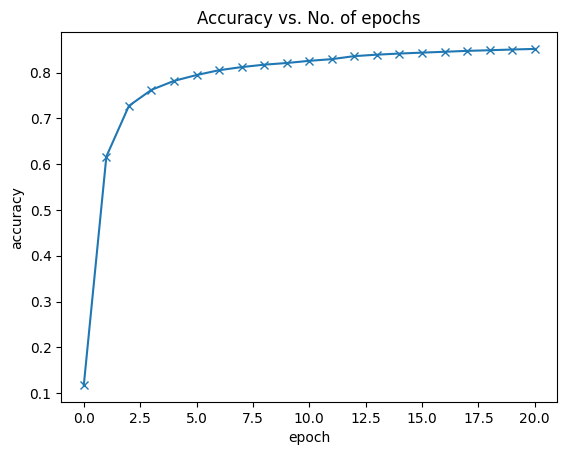

In [126]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 

#### 2.3(c) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [127]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


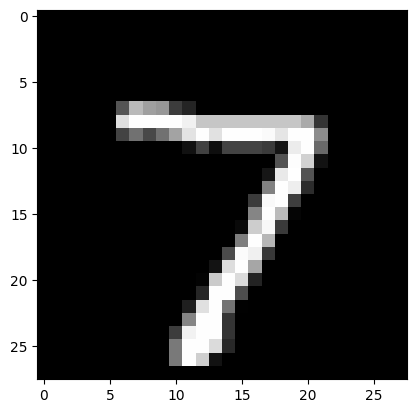

In [128]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [129]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

#### 2.3(d) Sample Predictions

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


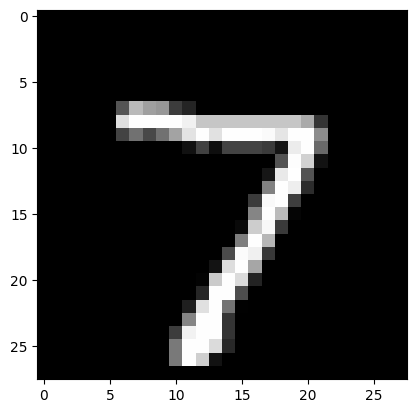

In [130]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


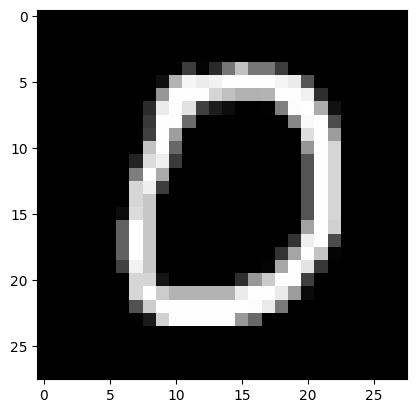

In [131]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


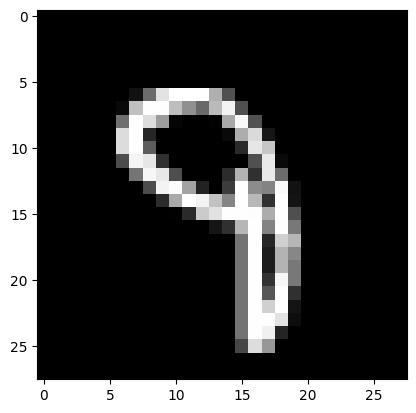

In [132]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


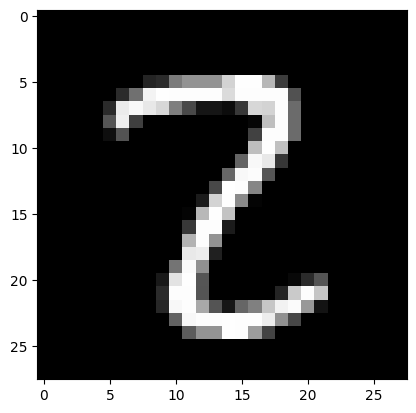

In [133]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [134]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6412789225578308, 'val_acc': 0.8599609136581421}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

#### 2.3(e) Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [135]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [136]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0331,  0.0157,  0.0283,  ...,  0.0050,  0.0238, -0.0123],
                      [ 0.0243,  0.0038, -0.0080,  ..., -0.0110, -0.0133,  0.0066],
                      [ 0.0230, -0.0025,  0.0211,  ..., -0.0155, -0.0085, -0.0053],
                      ...,
                      [-0.0076, -0.0189, -0.0063,  ...,  0.0292,  0.0137, -0.0150],
                      [-0.0319,  0.0159,  0.0292,  ..., -0.0108, -0.0340,  0.0320],
                      [-0.0090,  0.0207, -0.0333,  ...,  0.0237, -0.0300,  0.0181]])),
             ('linear.bias',
              tensor([-0.0616,  0.0972, -0.0432, -0.0139,  0.0332,  0.0618,  0.0176,  0.0246,
                      -0.1035, -0.0145]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [137]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0325, -0.0161, -0.0277,  ..., -0.0127,  0.0043,  0.0097],
                      [-0.0237, -0.0034,  0.0235,  ...,  0.0310, -0.0154, -0.0019],
                      [-0.0052, -0.0175,  0.0064,  ...,  0.0088, -0.0238,  0.0188],
                      ...,
                      [ 0.0347, -0.0329, -0.0140,  ...,  0.0245, -0.0267,  0.0271],
                      [ 0.0189, -0.0350,  0.0165,  ...,  0.0189, -0.0304, -0.0134],
                      [-0.0339,  0.0345,  0.0204,  ...,  0.0097,  0.0032,  0.0136]])),
             ('linear.bias',
              tensor([ 0.0025, -0.0197, -0.0272,  0.0051, -0.0262,  0.0041, -0.0246,  0.0342,
                      -0.0137, -0.0186]))])

In [138]:
evaluate(model2, test_loader)

{'val_loss': 2.3119964599609375, 'val_acc': 0.1357421875}

In [139]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0331,  0.0157,  0.0283,  ...,  0.0050,  0.0238, -0.0123],
                      [ 0.0243,  0.0038, -0.0080,  ..., -0.0110, -0.0133,  0.0066],
                      [ 0.0230, -0.0025,  0.0211,  ..., -0.0155, -0.0085, -0.0053],
                      ...,
                      [-0.0076, -0.0189, -0.0063,  ...,  0.0292,  0.0137, -0.0150],
                      [-0.0319,  0.0159,  0.0292,  ..., -0.0108, -0.0340,  0.0320],
                      [-0.0090,  0.0207, -0.0333,  ...,  0.0237, -0.0300,  0.0181]])),
             ('linear.bias',
              tensor([-0.0616,  0.0972, -0.0432, -0.0139,  0.0332,  0.0618,  0.0176,  0.0246,
                      -0.1035, -0.0145]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [140]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6412789225578308, 'val_acc': 0.8599609136581421}

### *`Exercises`*

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/02-insurance-linear-regression
* Starter notebook for logistic regression projects: https://jovian.ai/aakashns/mnist-logistic-minimal
* Starter notebook for linear regression projects: https://jovian.ai/aakashns/housing-linear-minimal

Training great machine learning models within a short time takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

### *`Summary and Further Reading`*

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 
* Saving and loading model checkpoints to avoid retraining from scratch

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try making the validation set smaller or larger, and see how it affects the model.
* Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
* Try changing the batch size. What happens if you use too high a batch size, or too low?
* Modify the `fit` function to also track the overall loss and accuracy on the training set, and see how it compares with the validation loss/accuracy. Can you explain why it's lower/higher?
* Train with a small subset of the data, and see if you can reach a similar level of accuracy.
* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:
* For a more mathematical treatment, see the popular [Machine Learning](https://www.coursera.org/lecture/machine-learning/classification-wlPeP) course on Coursera. Most of the images used in this tutorial series have been taken from this course.
* The training loop defined in this notebook was inspired from [FastAI development notebooks](https://github.com/fastai/fastai_docs/blob/master/dev_nb/001a_nn_basics.ipynb) which contain a wealth of other useful stuff if you can read and understand the code.
* For a deep dive into softmax and cross entropy, see [this blog post on DeepNotes](https://deepnotes.io/softmax-crossentropy).


With this we complete our discussion of logistic regression, and we're ready to move on to the next topic: [Training Deep Neural Networks on a GPU](https://jovian.ai/aakashns/04-feedforward-nn)!

## Lesson 3: `Training Deep Neural Networks on a GPU`

**Topics covered in this lesson:** <br/>

### 3.1 Activation Functions, Non-Linearity & Backprop
### 3.2 Training Models faster using Cloud GPUs
### 3.3 Experimenting with Hyperparameters to Improve the Model

### 3.1 `Activation Functions, Non-Linearity & Backprop`

#### 3.1(a) Preparing the Dataset

We have already done this in the above segment so below lines of codes doesn't need to be executed again!!<br/>
**`Codes:`**<br/>

* dataset = MNIST(root='data/', download=True, transform=ToTensor())
* Let's look at a couple of images from the dataset. The images are converted to PyTorch tensors with the shape `1x28x28` (the dimensions represent color channels, width and height). We can use `plt.imshow` to display the images. However, `plt.imshow` expects channels to be last dimension in an image tensor, so we use the `permute` method to reorder the dimensions of the image.<br/>

    image, label = dataset[0]<br/>
    print('image.shape:', image.shape)<br/>
    plt.imshow(image.permute(1, 2, 0), cmap='gray')<br/>
    print('Label:', label)<br/>


#### 3.1(b) Using `random_split` helper Function

image.shape: torch.Size([1, 28, 28])
Label: 7


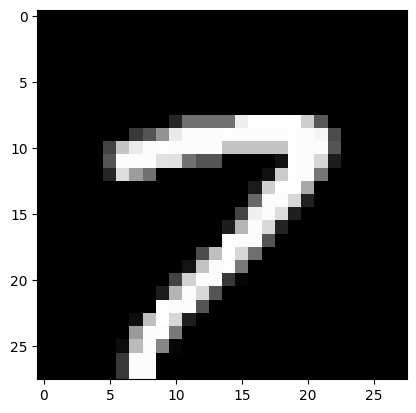

In [141]:
image, label = dataset[123]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

Next, let's use the `random_split` helper function to set aside 10000 images for our validation set.

In [142]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

We can now create PyTorch data loaders for training and validation.

In [143]:
batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

**`num_workers` and `pin_memory`:** this incorporates some parallelism into the data loading process, so that if the machine where all this code is running if that has multiple cores then multiple cores can be used to load the data in parallel.

To figure out the purpose of the arguments `num_workers` and `pin_memory`? Try looking into the documentation: https://pytorch.org/docs/stable/data.html .

Let's visualize a batch of data in a grid using the `make_grid` function from `torchvision`. We'll also use the `.permute` method on the tensor to move the channels to the last dimension, as expected by `matplotlib`.

images.shape: torch.Size([128, 1, 28, 28])


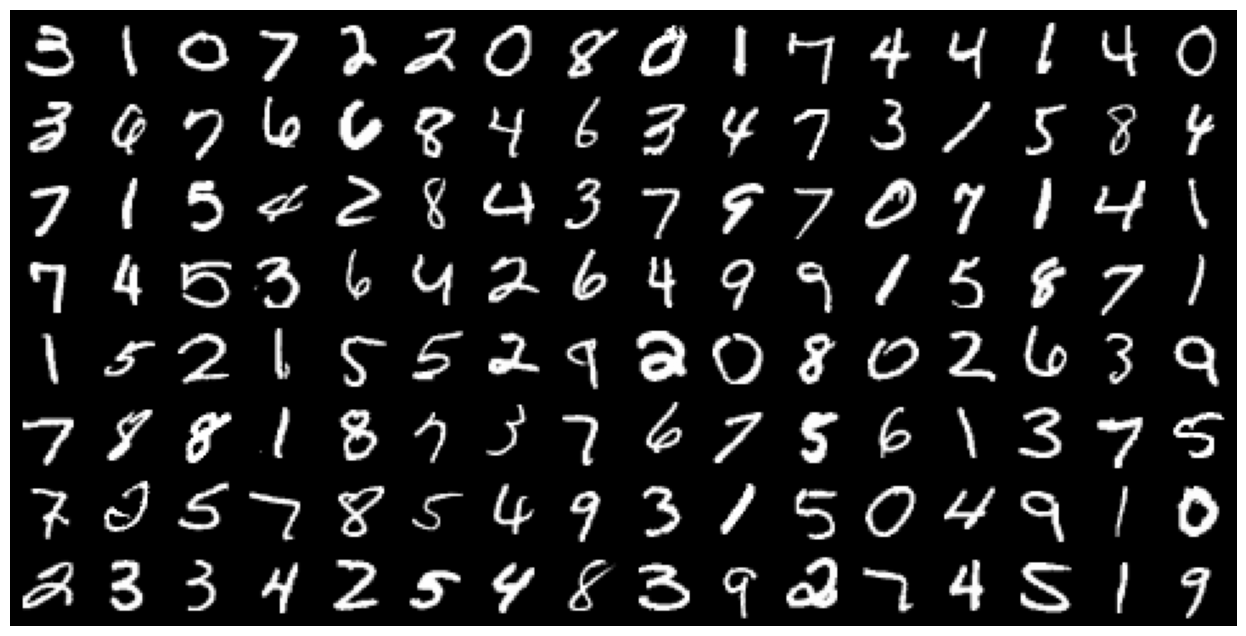

In [144]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

#### 3.1(c) Hidden Layers, Activation Functions and Non-Linearity

We'll create a neural network with two layers: a _hidden layer_ and an _output layer_. Additionally, we'll use an _activation function_ between the two layers. Let's look at a step-by-step example to learn how hidden layers and activation functions can help capture non-linear relationships between inputs and outputs.

First, let's create a batch of inputs tensors. We'll flatten the `1x28x28` images into vectors of size `784`, so they can be passed into an `nn.Linear` object.

In [145]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Next, let's create a `nn.Linear` object, which will serve as our _hidden_ layer. We'll set the size of the output from the hidden layer to 32. This number can be increased or decreased to change the _learning capacity_ of the model.

In [146]:
input_size = inputs.shape[-1]
hidden_size = 32

In [147]:
layer1 = nn.Linear(input_size, hidden_size)

We can now compute intermediate outputs for the batch of images by passing `inputs` through `layer1`.

In [148]:
inputs.shape

torch.Size([128, 784])

In [149]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The image vectors of size `784` are transformed into intermediate output vectors of length `32` by performing a matrix multiplication of `inputs` matrix with the transposed weights matrix of `layer1` and adding the bias. We can verify this using `torch.allclose`. For a more detailed explanation, review the tutorial on [linear regression](https://jovian.ai/aakashns/02-linear-regression).

In [150]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [151]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

Thus, `layer1_outputs` and `inputs` have a linear relationship, i.e., each element of `layer_outputs` is a weighted sum of elements from `inputs`. Thus, even as we train the model and modify the weights, `layer1` can only capture linear relationships between `inputs` and `outputs`.

<img src="https://i.imgur.com/inXsLuq.png" width="360">

Next, we'll use the Rectified Linear Unit (ReLU) function as the activation function for the outputs. It has the formula `relu(x) = max(0,x)` i.e. it simply replaces negative values in a given tensor with the value 0. ReLU is a non-linear function, as seen here visually:

<img src="https://i.imgur.com/yijV4xF.png" width="420">

We can use the `F.relu` method to apply ReLU to the elements of a tensor.

In [152]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

Let's apply the activation function to `layer1_outputs` and verify that negative values were replaced with 0.

In [153]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs.shape:',relu_outputs.shape)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

relu_outputs.shape: torch.Size([128, 32])
min(layer1_outputs): -0.5953226685523987
min(relu_outputs): 0.0


Now that we've applied a non-linear activation function, `relu_outputs` and `inputs` do not have a linear relationship. We refer to `ReLU` as the _activation function_, because for each input certain outputs are activated (those with non-zero values) while others turned off (those with zero values)

Next, let's create an output layer to convert vectors of length `hidden_size` in `relu_outputs` into vectors of length 10, which is the desired output of our model (since there are 10 target labels).

In [154]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [155]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [156]:
inputs.shape

torch.Size([128, 784])

As expected, `layer2_outputs` contains a batch of vectors of size 10. We can now use this output to compute the loss using `F.cross_entropy` and adjust the weights of `layer1` and `layer2` using gradient descent.

In [157]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.2947, grad_fn=<NllLossBackward0>)

Thus, our model transforms `inputs` into `layer2_outputs` by applying a linear transformation (using `layer1`), followed by a non-linear activation (using `F.relu`), followed by another linear transformation (using `layer2`). Let's verify this by re-computing the output using basic matrix operations.

In [158]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [159]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

Note that `outputs` and `inputs` do not have a linear relationship due to the non-linear activation function `F.relu`. As we train the model and adjust the weights of `layer1` and `layer2`, we can now capture non-linear relationships between the images and their labels. In other words, introducing non-linearity makes the model more powerful and versatile. Also, since `hidden_size` does not depend on the dimensions of the inputs or outputs, we vary it to increase the number of parameters within the model. We can also introduce new hidden layers and apply the same non-linear activation after each hidden layer.

The model we just created is called a neural network. A _deep neural network_ is simply a neural network with one or more hidden layers. In fact, the [Universal Approximation Theorem](http://neuralnetworksanddeeplearning.com/chap4.html) states that a sufficiently large & deep neural network can compute any arbitrary function i.e. it can _learn_ rich and complex non-linear relationships between inputs and targets. Here are some examples:

* Identifying if an image contains a cat or a dog (or [something else](https://machinelearningmastery.com/introduction-to-the-imagenet-large-scale-visual-recognition-challenge-ilsvrc/))
* Identifying the genre of a song using a 10-second sample
* Classifying movie reviews as positive or negative based on their content
* Navigating self-driving cars using a video feed of the road
* Translating sentences from English to French (and hundreds of other languages)
* Converting a speech recording to text and vice versa
* And many more...

It's hard to imagine how the simple process of multiplying inputs with randomly initialized matrices, applying non-linear activations, and adjusting weights repeatedly using gradient descent can yield such astounding results. Deep learning models often contain millions of parameters, which can together capture far more complex relationships than the human brain can comprehend.

If we hadn't included a non-linear activation between the two linear layers, the final relationship between inputs and outputs would still be linear. A simple refactoring of the computations illustrates this.

In [160]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [161]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [162]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [163]:
torch.allclose(outputs2, outputs3, 1e-3)

True

#### 3.1(d) Model

We are now ready to define our model. As discussed above, we'll create a neural network with one hidden layer. Here's what that means:

* Instead of using a single `nn.Linear` object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two `nn.Linear` objects. Each of these is called a _layer_ in the network. 

* The first layer (also known as the hidden layer) will transform the input matrix of shape `batch_size x 784` into an intermediate output matrix of shape `batch_size x hidden_size`. The parameter `hidden_size` can be configured manually (e.g., 32 or 64).

* We'll then apply a non-linear *activation function* to the intermediate outputs. The activation function transforms individual elements of the matrix.

* The result of the activation function, which is also of size `batch_size x hidden_size`, is passed into the second layer (also known as the output layer).  The second layer transforms it into a matrix of size `batch_size x 10`. We can use this output to compute the loss and adjust weights using gradient descent.


As discussed above, our model will contain one hidden layer. Here's what it looks like visually:

<img src="https://i.imgur.com/eN7FrpF.png" width="480">


Let's define the model by extending the `nn.Module` class from PyTorch.

In [164]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

We also need to define an `accuracy` function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in `validation_step` above.

In [165]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll create a model that contains a hidden layer with 32 activations.

In [166]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [167]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

Let's take a look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [168]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Let's try and generate some outputs using our model. We'll take the first batch of 128 images from our dataset and pass them into our model.

In [169]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.3056159019470215
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0092, -0.0471,  0.1896,  0.1359, -0.1485, -0.1921, -0.0115,  0.1731,
         -0.0707,  0.0081],
        [-0.0129,  0.0542,  0.0612,  0.0293, -0.1106, -0.1720, -0.0914,  0.0380,
         -0.1569, -0.0379]])


### 3.2 `Training Models faster using Cloud GPUs`(Local GPU in my Case)

#### 3.2(a) Checking for all the Available Devices and Versions

As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks. You can use GPUs for free on [Google Colab](https://colab.research.google.com/) and [Kaggle](https://www.kaggle.com/kernels) or rent GPU-powered machines on services like [Google Cloud Platform](https://cloud.google.com/gpu/), [Amazon Web Services](https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html), and [Paperspace](https://www.paperspace.com/).


Checking the Versions of all the drivers installed/present

In [170]:
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION:', )
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices: ', torch.cuda.device_count())
print ('Current cuda device: ', torch.cuda.current_device())
# get the name of the device
print('Current Device Name: ', torch.cuda.get_device_name(0)
)

__Python VERSION: 3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)]
__pyTorch VERSION: 1.13.1+cu117
__CUDA VERSION:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Mon_Oct_24_19:40:05_Pacific_Daylight_Time_2022
Cuda compilation tools, release 12.0, V12.0.76
Build cuda_12.0.r12.0/compiler.31968024_0
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices:  1
Current cuda device:  0
Current Device Name:  NVIDIA GeForce GTX 1650 Ti


In [171]:
# By default PyTorch generates Tensors on CPU
X_train = torch.FloatTensor([0., 1., 2.])
X_train.is_cuda


False

In [172]:
# setting device on GPU if available, else CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Using device: cuda:0

NVIDIA GeForce GTX 1650 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


c:\Users\adity\Videos\Courses\git_projects\pytorch-zero_To_GANs\torchvenv\lib\site-packages\torch\cuda\memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [173]:
X_train = X_train.to(device)
X_train.is_cuda

True

#### 3.2(b) Using a GPU

We can also check if a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available`.

In [174]:
torch.cuda.is_available()

True

Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't. 

In [175]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [176]:
device = get_default_device()
device

device(type='cuda')

Next, let's define a function that can move data and model to a chosen device.

In [177]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [178]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [179]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

The `yield` keyword in Python is used to create a generator function that can be used within a `for` loop, as illustrated below.

In [180]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


We can now wrap our data loaders using `DeviceDataLoader`.

In [181]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

Tensors moved to the GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`.

In [182]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([2, 5, 4, 0, 4, 1, 3, 2, 6, 5, 1, 0, 6, 3, 8, 4, 6, 1, 7, 1, 9, 8, 8, 2,
        6, 3, 6, 4, 8, 2, 3, 8, 7, 1, 9, 7, 2, 0, 5, 3, 5, 3, 5, 1, 9, 5, 3, 0,
        6, 4, 5, 1, 3, 2, 8, 1, 7, 2, 0, 3, 2, 5, 2, 4, 6, 4, 8, 3, 6, 5, 7, 9,
        2, 6, 9, 7, 4, 3, 0, 5, 0, 6, 0, 8, 5, 7, 6, 1, 0, 4, 1, 9, 8, 6, 6, 7,
        7, 1, 5, 0, 0, 6, 0, 1, 8, 1, 8, 5, 6, 3, 9, 3, 0, 8, 4, 9, 4, 5, 8, 9,
        8, 0, 0, 5, 6, 6, 3, 1, 5, 4, 2, 6, 9, 2, 8, 7, 5, 6, 7, 0, 3, 8, 6, 6,
        6, 6, 0, 3, 5, 8, 7, 7, 8, 6, 2, 2, 1, 9, 7, 3, 7, 1, 0, 5, 7, 0, 3, 2,
        9, 6, 9, 3, 4, 3, 2, 5, 0, 1, 9, 8, 8, 8, 7, 4, 6, 1, 8, 4, 9, 3, 7, 1,
        9, 5, 8, 7, 8, 8, 9, 3, 1, 8, 7, 7, 5, 1, 8, 5, 6, 1, 5, 2, 6, 0, 1, 1,
        8, 5, 6, 2, 2, 8, 2, 7, 6, 9, 4, 1, 1, 5, 1, 9, 6, 5, 9, 9, 0, 8, 3, 9,
        8, 3, 7, 5, 8, 8, 1, 8, 2, 2, 7, 5, 7, 9, 2, 2], device='cuda:0')


### 3.3 `Experimenting with Hyperparameters to Improve the Model`

#### 3.3(a) Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

In [183]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the `to_device` function to move the model's parameters to the right device. 

In [184]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [185]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.2996652126312256, 'val_acc': 0.09355469048023224}]

The initial accuracy is around 10%, as one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [186]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2384, val_acc: 0.9291
Epoch [1], val_loss: 0.1931, val_acc: 0.9428
Epoch [2], val_loss: 0.1937, val_acc: 0.9414
Epoch [3], val_loss: 0.1591, val_acc: 0.9519
Epoch [4], val_loss: 0.1503, val_acc: 0.9550


96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

In [187]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1259, val_acc: 0.9625
Epoch [1], val_loss: 0.1259, val_acc: 0.9621
Epoch [2], val_loss: 0.1240, val_acc: 0.9620
Epoch [3], val_loss: 0.1233, val_acc: 0.9629
Epoch [4], val_loss: 0.1226, val_acc: 0.9621


We can now plot the losses & accuracies to study how the model improves over time.

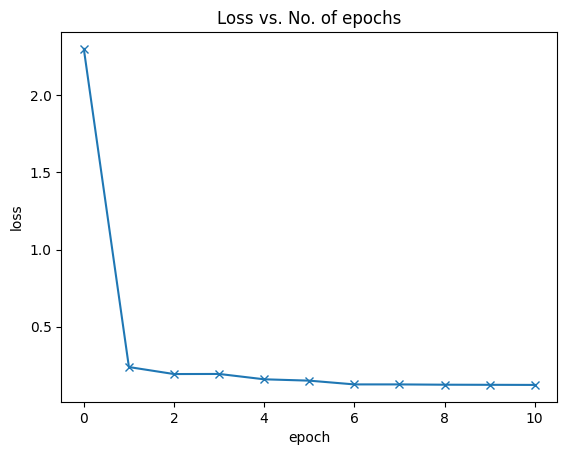

In [188]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

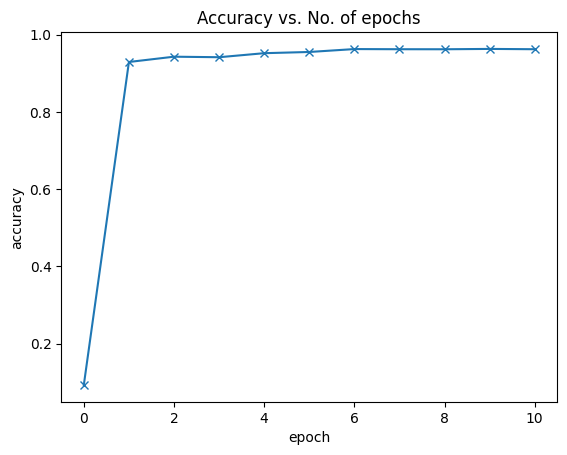

In [189]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Our current model outperforms the logistic regression model (which could only achieve around 86% accuracy) by a considerable margin! It quickly reaches an accuracy of 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.

#### 3.3(b) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [190]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [191]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Let's try it out with a few images.

Label: 7 , Predicted: 7


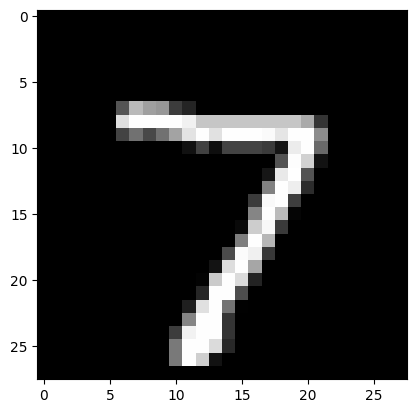

In [192]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


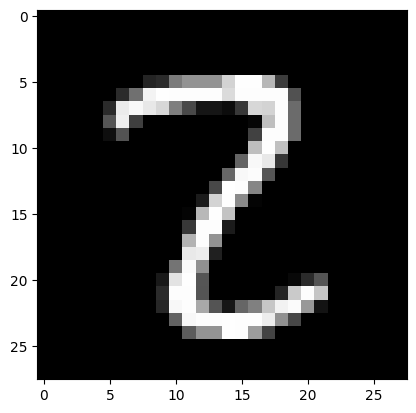

In [193]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


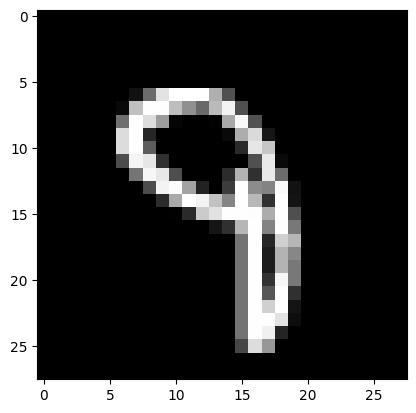

In [194]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [195]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10360733419656754, 'val_acc': 0.96923828125}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [196]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

### `Exercises`

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/03-cifar10-feedforward
* Starter notebook for deep learning models:  https://jovian.ai/aakashns/fashion-feedforward-minimal

Training great machine learning models reliably takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

### `Summary and Further Reading`

Here is a summary of the topics covered in this tutorial:

* We created a neural network with one hidden layer to improve upon the logistic regression model from the previous tutorial. We also used the ReLU activation function to introduce non-linearity into the model, allowing it to learn more complex relationships between the inputs (pixel densities) and outputs (class probabilities).

* We defined some utilities like `get_default_device`, `to_device` and `DeviceDataLoader` to leverage a GPU if available, by moving the input data and model parameters to the appropriate device.

* We were able to use the exact same training loop: the `fit` function we had define earlier to train out model and evaluate it using the validation dataset.

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try changing the size of the hidden layer, or add more hidden layers and see if you can achieve a higher accuracy.

* Try changing the batch size and learning rate to see if you can achieve the same accuracy in fewer epochs.

* Compare the training times on a CPU vs. GPU. Do you see a significant difference. How does it vary with the size of the dataset and the size of the model (no. of weights and parameters)?

* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:

* [A visual proof that neural networks can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html), also known as the Universal Approximation Theorem.

* [But what *is* a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) - A visual and intuitive introduction to what neural networks are and what the intermediate layers represent

* [Stanford CS229 Lecture notes on Backpropagation](https://github.com/BirajCoder/File-host-repo/blob/main/backprop.pdf) - for a more mathematical treatment of how gradients are calculated and weights are updated for neural networks with multiple layers.


You are now ready to move on to the next tutorial: [Image Classification using Convolutional Neural Networks](https://jovian.ai/aakashns/05-cifar10-cnn).

## Lesson 4: `Image Classification with Convolutional Neural Networks(CNN)`

**Topics covered in this lesson:** <br/>

### 4.1 Working with 3-Channel RGB Images
### 4.2 Convolutions, Kernels & Features Maps
### 4.3 Training Curve, Underfitting & Overfitting

### 4.1 `Working with 3-Channel RGB Images`

#### 4.1(a) Exploring the CIFAR10 Dataset

In the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn), we trained a feedfoward neural networks with a single hidden layer to classify handwritten digits from the [MNIST dataset](http://yann.lecun.com/exdb/mnist) with over 97% accuracy. For this tutorial, we'll use the CIFAR10 dataset, which consists of 60000 32x32 px colour images in 10 classes. Here are some sample images from the dataset:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">

We'll download the images in PNG format from [this page](https://course.fast.ai/datasets), using some helper functions from the `torchvision` and `tarfile` packages.

In [197]:
project_name='05-cifar10-cnn'

In [198]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: .\cifar10.tgz


In [199]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

The dataset is extracted to the directory `data/cifar10`. It contains 2 folders `train` and `test`, containing the training set (50000 images) and test set (10000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using `os.listdir`.

In [200]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Let's look inside a couple of folders, one from the training set and another from the test set. As an exercise, you can verify that that there are an equal number of images for each class, 5000 in the training set and 1000 in the test set.

In [201]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [202]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [203]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [204]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape `(3, 32, 32)`.

In [205]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [206]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(32,32,3)`. Let's create a helper function to display an image and its label.

In [207]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Label:  airplane (0)


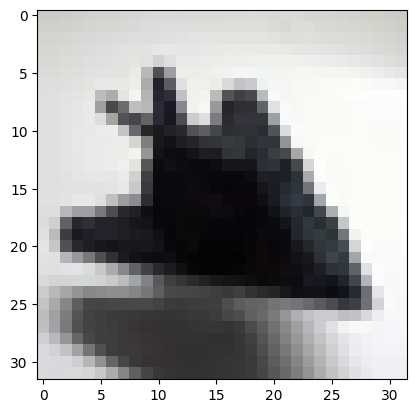

In [208]:
show_example(*dataset[0])

**show_example(`*dataset[0]`)**: is the *args function of Python wherein it just does the following without us explicitly doing <br/>

*img, label = dataset[0]* <br/>
*show_example(img, label)*

Label:  airplane (0)


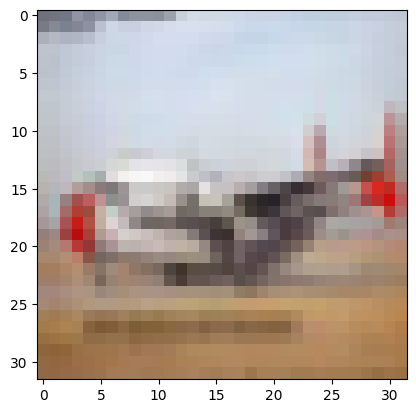

In [209]:
show_example(*dataset[1099])

#### 4.1(b) Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (5000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [210]:
random_seed = 42
torch.manual_seed(random_seed);

In [211]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [212]:
batch_size=128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [213]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

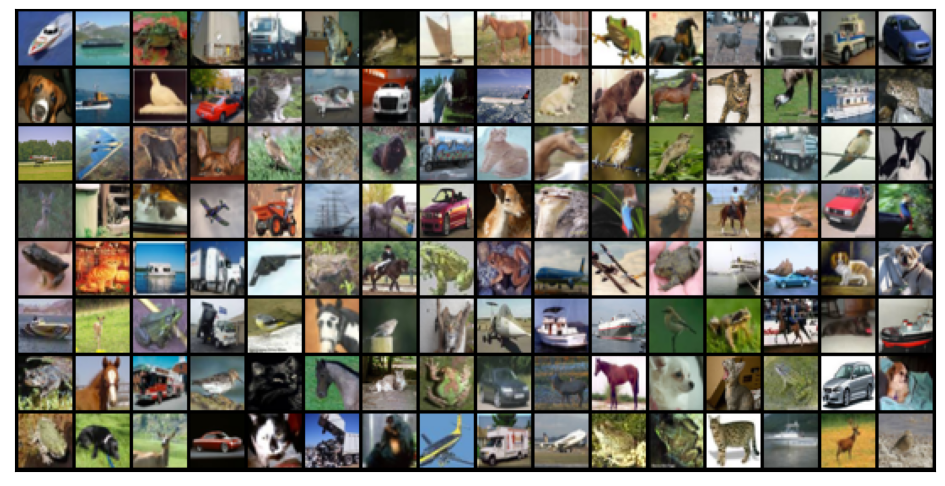

In [214]:
show_batch(train_dl)

### 4.2 `Convolutions, Kernels & Features Maps`

#### 4.2(a) Defining the Model (Convolutional Neural Network)

In our [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn), we defined a deep neural network with fully-connected layers using `nn.Linear`. For this tutorial however, we will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch.

> The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. - [Source](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">


Let us implement a convolution operation on a 1 channel image with a 3x3 kernel.

In [215]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [216]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

#### 4.2(b) Kernels and Feature Maps

For multi-channel images, a different kernel is applied to each channels, and the outputs are added together pixel-wise. 

Checking out the following articles to gain a better understanding of convolutions:

1. [Intuitively understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) by Irhum Shafkat

    * Each filter in a convolution layer produces one and only one output channel, and they do it like so:

        Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).

        <img src="https://miro.medium.com/max/828/1*8dx6nxpUh2JqvYWPadTwMQ.gif" style="max-width:800px;"><br/>

    * Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each   channel, and the filter as a whole produces one overall output channel. 

        <img src="https://miro.medium.com/max/828/1*CYB2dyR3EhFs1xNLK8ewiA.gif" style="max-width:800px;"><br/>

    * Finally, then there’s the bias term. The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.

        <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" style="max-width:800px;"><br/>

2. [Convolutions in Depth](https://sgugger.github.io/convolution-in-depth.html) by Sylvian Gugger (this article implements convolutions from scratch)

There are certain advantages offered by convolutional layers when working with image data:

* **Fewer parameters**: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer. 
* **Sparsity of connections**: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.
* **Parameter sharing and spatial invariance**: The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.

We will also use a [max-pooling](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) layers to progressively decrease the height & width of the output tensors from each convolutional layer.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" style="max-width:400px;">

Before we define the entire model, let's look at how a single convolutional layer followed by a max-pooling layer operates on the data.

In [217]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

Refer to [Sylvian's post](https://sgugger.github.io/convolution-in-depth.html) for an explanation of `kernel_size`, `stride` and `padding`.    

In [218]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


The `Conv2d` layer transforms a 3-channel image to a 16-channel *feature map*, and the `MaxPool2d` layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.

<img src="https://i.imgur.com/KKtPOKE.png">

Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

In [219]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

In [220]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Each Input: 3 x 32 x 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            # Output: 32 x 32 x 32
            nn.ReLU(),
            # Output: 32 x 32 x 32
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # Output: 64 x 32 x 32
            nn.ReLU(),
            # Output: 64 x 32 x 32
            nn.MaxPool2d(2, 2), 
            # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [221]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image. Check out [Part 3 (logistic regression)](https://jovian.ml/aakashns/03-logistic-regression#C50) for a more detailed discussion on interpeting the outputs, applying softmax and identifying the predicted labels.

In [222]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0239, -0.0466,  0.0067,  0.0193,  0.0044, -0.0598, -0.0188, -0.0242,
         0.0431, -0.0164], grad_fn=<SelectBackward0>)


#### 4.2(c) Using the GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. These are described in more detail in the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn#C21).

In [223]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [224]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [225]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

#### 4.2(d) Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

In [226]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [227]:
model = to_device(Cifar10CnnModel(), device)

In [228]:
evaluate(model, val_dl)

{'val_loss': 2.302245855331421, 'val_acc': 0.10039062798023224}

The initial accuracy is around 10%, which is what one might expect from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We'll use the following *hyperparmeters* (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time. 

In [229]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [230]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7729, val_loss: 1.4548, val_acc: 0.4595
Epoch [1], train_loss: 1.2494, val_loss: 1.1196, val_acc: 0.5870
Epoch [2], train_loss: 0.9925, val_loss: 0.9235, val_acc: 0.6749
Epoch [3], train_loss: 0.8078, val_loss: 0.8050, val_acc: 0.7193
Epoch [4], train_loss: 0.6727, val_loss: 0.7560, val_acc: 0.7418
Epoch [5], train_loss: 0.5450, val_loss: 0.7572, val_acc: 0.7430
Epoch [6], train_loss: 0.4399, val_loss: 0.7254, val_acc: 0.7664
Epoch [7], train_loss: 0.3434, val_loss: 0.7877, val_acc: 0.7600
Epoch [8], train_loss: 0.2662, val_loss: 0.7855, val_acc: 0.7626
Epoch [9], train_loss: 0.2051, val_loss: 0.8613, val_acc: 0.7724


We can also plot the valdation set accuracies to study how the model improves over time.

In [231]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

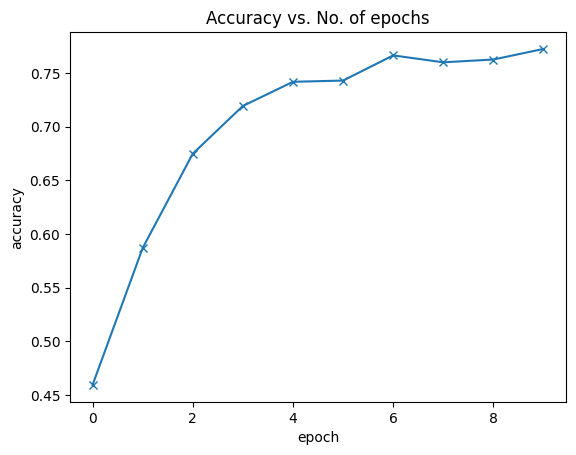

In [232]:
plot_accuracies(history)

Our model reaches an accuracy of around 75%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 80% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

In [233]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

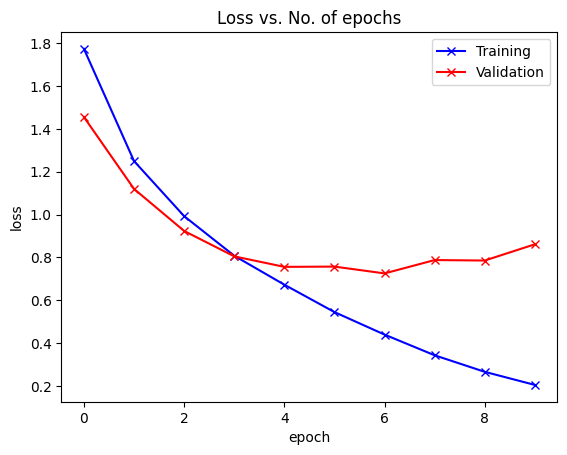

In [234]:
plot_losses(history)

### 4.3 `Training Curve, Underfitting & Overfitting`

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point! 

<img src="https://i.stack.imgur.com/1QU0m.png" style="max-width:400px;">

This phenomenon is called **overfitting**, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.


Following are some common stragegies for avoiding overfitting:

- Gathering and generating more training data, or adding noise to it
- Using regularization techniques like batch normalization & dropout
- Early stopping of model's training, when validation loss starts to increase

We will cover these topics in more detail in the next tutorial in this series, and learn how we can reach an accuracy of **over 90%** by making minor but important changes to our model.

#### 4.3(a) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the `ImageFolder` class.


In [235]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [236]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


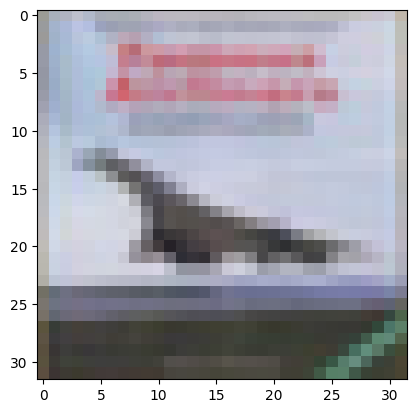

In [237]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


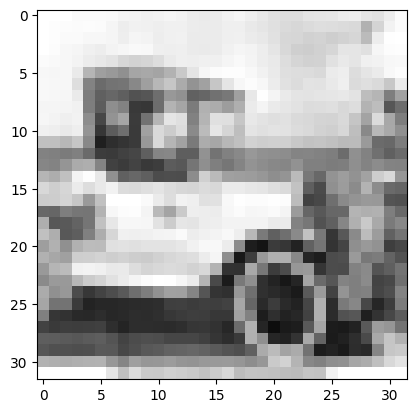

In [238]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


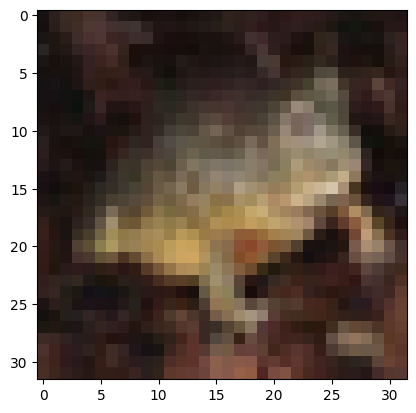

In [239]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using `jovian`. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [240]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8994604349136353, 'val_acc': 0.7710937261581421}

#### 4.3(b) Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [241]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [242]:
model2 = to_device(Cifar10CnnModel(), device)

In [243]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [244]:
evaluate(model2, test_loader)

{'val_loss': 0.8994604349136353, 'val_acc': 0.7710937261581421}

### Summary and Further Reading/Exercises

We've covered a lot of ground in this tutorial. Here's quick recap of the topics:
* Introduction to the CIFAR10 dataset for image classification
* Downloading, extracing and loading an image dataset using `torchvision`
* Show random batches of images in a grid using `torchvision.utils.make_grid`
* Creating a convolutional neural network using with `nn.Conv2d` and `nn.MaxPool2d` layers
* Capturing dataset information, metrics and hyperparameters using the `jovian` library
* Training a convolutional neural network and visualizing the losses and errors
* Understanding overfitting and the strategies for avoiding it (more on this later)
* Generating predictions on single images from the test set
* Saving and loading the model weights, and attaching them to the eperiment snaptshot using `jovian`

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:
* Try chaging the hyperparameters to achieve a higher accuracy within fewer epochs. You use the comparison table on the Jovian.ml project page to compare your experiments.
* Try adding more convolutional layers, or increasing the number of channels in each convolutional layer
* Try using a feedforward neural network and see what's the maximum accuracy you can achieve
* Read about some of the startegies mentioned above for reducing overfitting and achieving better results, and try to implement them by looking into the PyTorch docs.
* Modify this notebook to train a model for a different dataset (e.g. CIFAR100 or ImageNet)

In the next tutorial, we will continue to improve our model's accuracy using techniques like data augmentation, batch normalization and dropout. We will also learn about residual networks (or ResNets), a small but critical change to the model architecture that will significantly boost the performance of our model. Stay tuned!

## Lesson 5: `Data Augmentation, Regularization and ResNets`

**Topics covered in this lesson:** <br/>

### 5.1 Adding Residual Layers with Batchnorm to CNNs
### 5.2 Learning Rate Annealing, Weight Decay & More
### 5.3 Training a State-Of-The-Art Model in 5 Minutes

In this tutorial, we'll use the following techniques to train a state-of-the-art model in less than 5 minutes to achieve over 90% accuracy in  classifying images from the CIFAR10 dataset:

- Data normalization
- Data augmentation
- Residual connections
- Batch normalization
- Learning rate scheduling
- Weight Decay
- Gradient clipping
- Adam optimizer

### 5.1 `Adding Residual Layers with Batchnorm to CNNs`

In [245]:
project_name='05b-cifar10-resnet'

#### 5.1(a) Preparing the CIFAR10 Dataset

This notebook is an extension to the tutorial [Image Classification using CNNs in PyTorch](https://jovian.ai/aakashns/05-cifar10-cnn), where we trained a deep convolutional neural network to classify images from the CIFAR10 dataset with around 75% accuracy. Here are some images from the dataset:

![cifar10](https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png)


Let's begin by downloading the dataset and creating PyTorch datasets to load the data, just as we did in the previous tutorial.

In [246]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
    
# Look into the data directory
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

Using downloaded and verified file: .\cifar10.tgz
['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### 5.1(b) Data Augmentation and Normalization

We can create training and validation datasets using the `ImageFolder` class from `torchvision`. In addition to the `ToTensor` transform, we'll also apply some other transforms to the images. There are a few important changes we'll make while creating PyTorch datasets for training and validation:

1. **Use test set for validation**: Instead of setting aside a fraction (e.g. 10%) of the data from the training set for validation, we'll simply use the test set as our validation set. This just gives a little more data to train with. In general, once you have picked the best model architecture & hypeparameters using a fixed validation set, it is a good idea to retrain the same model on the entire dataset just to give it a small final boost in performance.
2. **Channel-wise data normalization**: We will normalize the image tensors by subtracting the mean and dividing by the standard deviation across each channel. As a result, the mean of the data across each channel is 0, and standard deviation is 1. Normalizing the data prevents the values from any one channel from disproportionately affecting the losses and gradients while training, simply by having a higher or wider range of values that others.

<img src="https://i.imgur.com/LYxXBVg.png" width="360">


3. **Randomized data augmentations**: We will apply randomly chosen transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. Since the transformation will be applied randomly and dynamically each time a particular image is loaded, the model sees slightly different images in each epoch of training, which allows it generalize better.

![data-augmentation](https://imgaug.readthedocs.io/en/latest/_images/cropandpad_percent.jpg)

In [247]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [248]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

Next, we can create data loaders for retrieving images in batches. We'll use a relatively large batch size of 500 to utlize a larger portion of the GPU RAM. You can try reducing the batch size & restarting the kernel if you face an "out of memory" error.

In [249]:
batch_size = 400

In [250]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

Let's take a look at some sample images from the training dataloader. To display the images, we'll need to _denormalize_ the pixels values to bring them back into the range `(0,1)`.

In [251]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

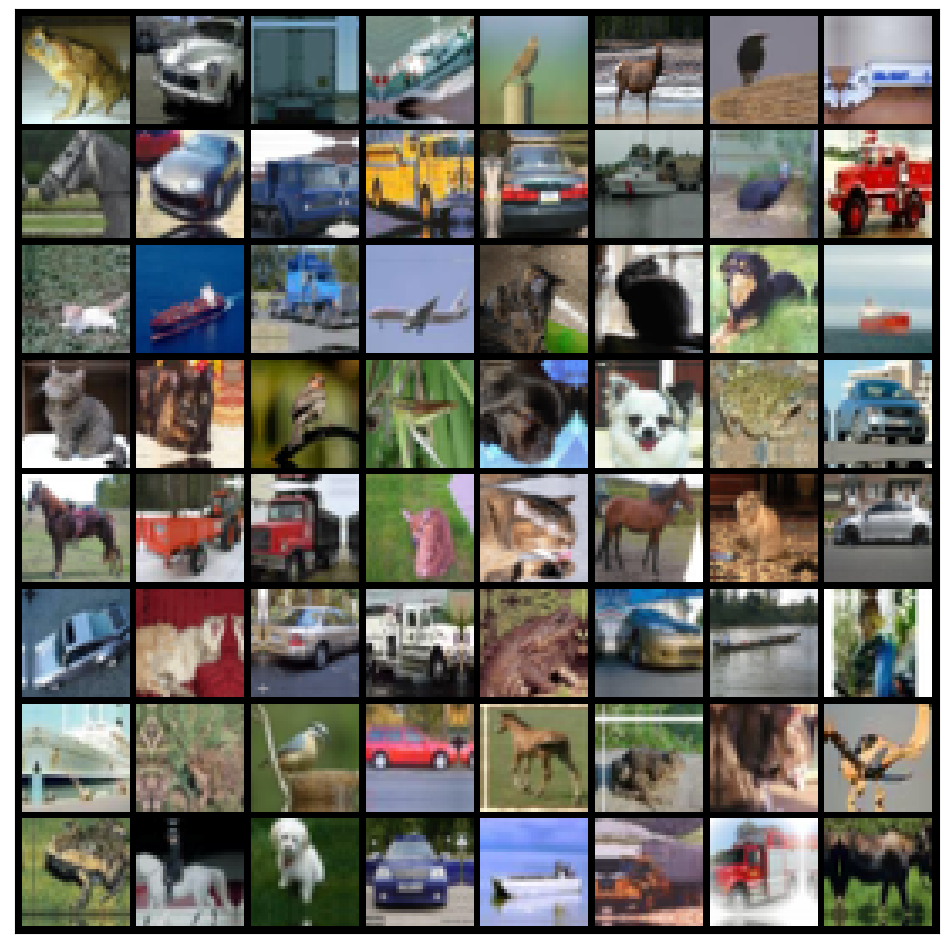

In [252]:
show_batch(train_dl)

The colors seem out of place because of the normalization. Note that normalization is also applied during inference. If you look closely, you can see the cropping and reflection padding in some of the images. Horizontal flip is a bit difficult to detect from visual inspection.

#### 5.1(c) Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. These are described in more detail in a [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn#C21).

In [253]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [254]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [255]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

#### 5.1(d) Model with Residual Blocks and Batch Normalization

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

Here is a very simple Residual block:

In [256]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [257]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


This seeming small change produces a drastic improvement in the performance of the model. Also, after each convolutional layer, we'll add a batch normalization layer, which normalizes the outputs of the previous layer. 

Go through the following blog posts to learn more:

* Why and how residual blocks work: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
* Batch normalization and dropout explained: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

We will use the ResNet9 architecture, as described in [this blog series](https://www.myrtle.ai/2018/09/24/how_to_train_your_resnet/) :

![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In [258]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [259]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [260]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### 5.2 `Learning Rate Annealing, Weight Decay & More`

#### 5.2(a) Training the model

Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48


Let's define a `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [261]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [262]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3020260334014893, 'val_acc': 0.0921153873205185}]

### 5.3 `Training a State-Of-The-Art Model in 5 Minutes`

#### 5.3(a) Using Adam Optimizer

We're now ready to train our model. Instead of SGD (stochastic gradient descent), we'll use the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. You can learn more about optimizers here: https://ruder.io/optimizing-gradient-descent/index.html

In [263]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [264]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00393, train_loss: 1.5195, val_loss: 1.8504, val_acc: 0.4683
Epoch [1], last_lr: 0.00935, train_loss: 1.0844, val_loss: 0.9867, val_acc: 0.6691
Epoch [2], last_lr: 0.00972, train_loss: 0.8471, val_loss: 0.9016, val_acc: 0.7004
Epoch [3], last_lr: 0.00812, train_loss: 0.6311, val_loss: 0.7003, val_acc: 0.7728
Epoch [4], last_lr: 0.00556, train_loss: 0.4920, val_loss: 0.6448, val_acc: 0.7793
Epoch [5], last_lr: 0.00283, train_loss: 0.3906, val_loss: 0.3782, val_acc: 0.8697
Epoch [6], last_lr: 0.00077, train_loss: 0.2933, val_loss: 0.3006, val_acc: 0.8963
Epoch [7], last_lr: 0.00000, train_loss: 0.2193, val_loss: 0.2787, val_acc: 0.9059
CPU times: total: 33.3 s
Wall time: 27min 26s


In [265]:
#train_time='4:24'

Our model trained to over **90% accuracy in under 5 minutes**! Try playing around with the data augmentations, network architecture & hyperparameters to achive the following results:

1. 94% accuracy in under 10 minutes (easy)
2. 90% accuracy in under 2.5 minutes (intermediate)
3. 94% accuracy in under 5 minutes (hard)


Let's plot the valdation set accuracies to study how the model improves over time.

In [266]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

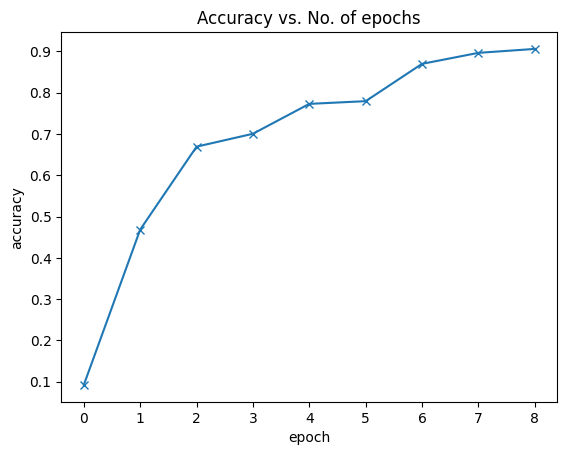

In [267]:
plot_accuracies(history)

We can also plot the training and validation losses to study the trend.

In [268]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

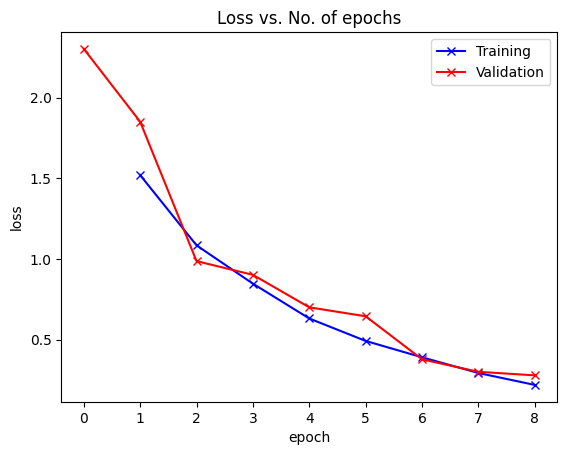

In [269]:
plot_losses(history)

It's clear from the trend that our model isn't overfitting to the training data just yet. Try removing batch normalization, data augmentation and residual layers one by one to study their effect on overfitting.

Finally, let's visualize how the learning rate changed over time, batch-by-batch over all the epochs.

In [270]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

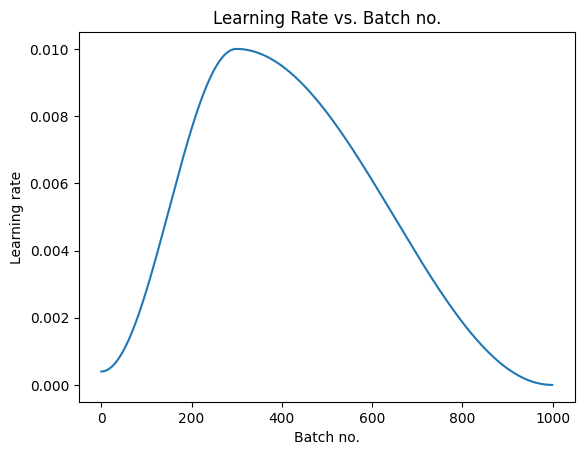

In [271]:
plot_lrs(history)

As expected, the learning rate starts at a low value, and gradually increases for 30% of the iterations to a maximum value of `0.01`, and then gradually decreases to a very small value.

#### 5.3(b) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images.


In [272]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: airplane , Predicted: airplane


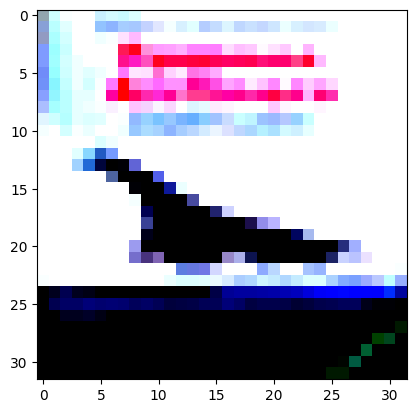

In [273]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: automobile , Predicted: automobile


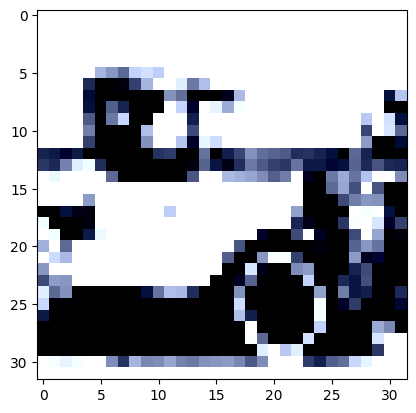

In [274]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: frog , Predicted: frog


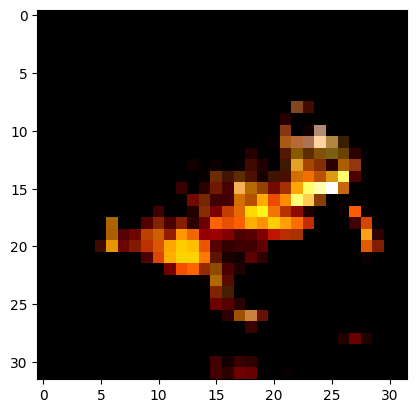

In [275]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

Save the Model

Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. As you try different ideas, make sure to record every experiment so you can look back and analyze the results.

In [276]:
torch.save(model.state_dict(), 'cifar10-resnet9.pth')

### `Summary and Further Reading`

You are now ready to train state-of-the-art deep learning models from scratch. Try working on a project on your own by following these guidelines: https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/assignment/course-project

Here's a summary of the different techniques used in this tutorial to improve our model performance and reduce the training time:


* **Data normalization**: We normalized the image tensors by subtracting the mean and dividing by the standard deviation of pixels across each channel. Normalizing the data prevents the pixel values from any one channel from disproportionately affecting the losses and gradients. [Learn more](https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd)

* **Data augmentation**: We applied random transformations while loading images from the training dataset. Specifically, we will pad each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. [Learn more](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/)

* **Residual connections**: One of the key changes to our CNN model was the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers. We used the ResNet9 architecture [Learn more](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec).

* **Batch normalization**: After each convolutional layer, we added a batch normalization layer, which normalizes the outputs of the previous layer. This is somewhat similar to data normalization, except it's applied to the outputs of a layer, and the mean and standard deviation are learned parameters. [Learn more](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are [many strategies](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for varying the learning rate during training, and we used the "One Cycle Learning Rate Policy". [Learn more](https://sgugger.github.io/the-1cycle-policy.html)

* **Weight Decay**: We added weight decay to the optimizer, yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. [Learn more](https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab)

* **Gradient clipping**: We also added gradient clippint, which helps limit the values of gradients to a small range to prevent undesirable changes in model parameters due to large gradient values during training.  [Learn more.](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48#63e0)

* **Adam optimizer**: Instead of SGD (stochastic gradient descent), we used the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. There are many other optimizers to choose froma and experiment with. [Learn more.](https://ruder.io/optimizing-gradient-descent/index.html)


As an exercise, you should try applying each technique independently and see how much each one affects the performance and training time. As you try different experiments, you will start to cultivate the intuition for picking the right architectures, data augmentation & regularization techniques.

You are now ready to move on to the next tutorial in this series: [Generating Images using Generative Adversarial Networks](https://jovian.ai/aakashns/06b-anime-dcgan/)